

```
# This is formatted as code
```

**Expectation:** find solution to MSE regression using GD, Line search, GD with Momentum and 2nd Order Method, and gradient free methods.


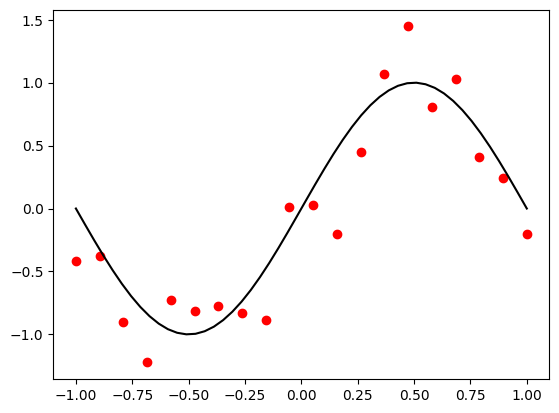

In [1]:
#Linear Regression for general functions
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
pi=math.pi

data_set_size = 20
noise_level = 0.3

# generate 20 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,data_set_size)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+noise_level*np.random.randn(x.size)

# plot the training data points
plt.plot(x, y, 'ro')

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')

In [2]:
N = x.shape[0]
M = 10
d = M+1 # dimensionality
X = []
for i in range(M+1):
  X.append(x**i)

X = np.array(X).T

print('x',X.shape)
print('y',y.shape)


x (20, 11)
y (20,)


In previous class we found w $\mathbf{w}$ using the closed form solution, today we first find $\mathbf{w}$ using Gradient Decent (GD). *Note for this toy example the is no reason to use a iterative optimiser, as the exact method exsist but it makes for a nice test bed.*

The Mean Squared Loss / Mean Squared Error (MSE) can be written as follows:

\begin{equation}
  L(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^N(\sum_{i=1}^{d+1} x_{n,i} \cdot w_i - y_n)^2
\end{equation}

Or written with matrices:

\begin{equation}
  L(\mathbf{w}) = \frac{1}{N} ||X\mathbf{w} - \mathbf{y}||_2^2 = \frac{1}{N} (X\mathbf{w} - \mathbf{y})^\top(X\mathbf{w} - \mathbf{y})
\end{equation}

**Question 1** Derive the gradient of the MSE. Write you answer here in latex:

\begin{equation}
  \hat{y}_i = X_i w
\end{equation}

\begin{equation}
  \nabla_\mathbf{w} L(\mathbf{w}) = \frac{\partial C}{\partial w} = \frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial w} = \frac{2}{n}{\sum{(X_i w-y_i)X_i}} = \frac{2}{n}{X^T}{(Xw-y)} = \frac{2}{n}{(X^{T}Xw-X^Ty)}
\end{equation}

We then use the following update:

**Question 2** prove that $L$ is convex in $\mathbf{w}$ (*hint think about the Hessian*)

Write you awnser here in latex:

To prove that $L$ is convex in $\mathbf{w}$, show that the Hessian matrix is positive semi-definite. That would be the derivative of the grad of L that we have found above.

$$
   \nabla^2 L(\mathbf{w}) = \nabla (\frac{2}{n}{(X^{T}Xw-X^Ty)}) = \frac{2}{n} \mathbf{X}^\top \mathbf{X} \\
$$

The above (gram matrix) is positive semi-definite. Hence, $L$ is convex in $\mathbf{w}$.

**Gradient Descent**

We will first optimise $L(\mathbf{w})$ using Gradient Descent.

Which uses the following update:


\begin{equation}
  \mathbf{w}_{t+1} = \mathbf{w}_t - \eta_t \nabla_\mathbf{w} L(\mathbf{w})
\end{equation}


**Question 3** complete the functions below to calcuate the loss and gradients for a given $X$, $\mathbf{y}$ & $\mathbf{w}$.

In [3]:
# It useful to first write a function that calculates the loss we will use this to measure our progress

def MSE_loss(X, y, w):
  mean_loss = (1/len(y))*(X@w-y).T@(X@w-y)
  return mean_loss

In [4]:
# a quick sanity check for your loss function, If this cell throws and error your loss function still needs work!
assert MSE_loss(np.array([0]), np.array([0]), np.array([0])) == 0
assert MSE_loss(np.array([1]), np.array([1]), np.array([1])) == 0
assert MSE_loss(np.array([1]), np.array([1]), np.array([0])) == 1
assert MSE_loss(np.array([1]), np.array([0]), np.array([1])) == 1

In [23]:
# It is also useful to have a function that calculate gradient at a given point
def grad(x, y, w):
  print('x shape: ', x.shape)
  print('y shape: ', y.shape)
  print('w shape: ', w.shape)

  n = x.shape[0]
  gradient = (2/len(y))*x.T@(x@w-y)
  return gradient

In [21]:
# a quick sanity check for your gradient function, If this cell throws and error your gradient fucntion still needs work!
assert la.norm(grad(np.array([[0,0],[0,0]]), np.zeros((2,1)), np.ones((2,1)))) == 0
assert la.norm(grad(np.array([[1,0],[0,0]]), np.zeros((2,1)), np.ones((2,1)))) == 1
assert la.norm(grad(np.array([[4,3],[4,3]]), np.zeros((2,1)), np.ones((2,1)))) == 70

x shape:  (2, 2)
y shape:  (2, 1)
w shape:  (2, 1)
x shape:  (2, 2)
y shape:  (2, 1)
w shape:  (2, 1)
x shape:  (2, 2)
y shape:  (2, 1)
w shape:  (2, 1)


**Question 4** Implement GD and run for 1000 steps. Save the loss value after each step in the list 'gd_losses'.

x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (2

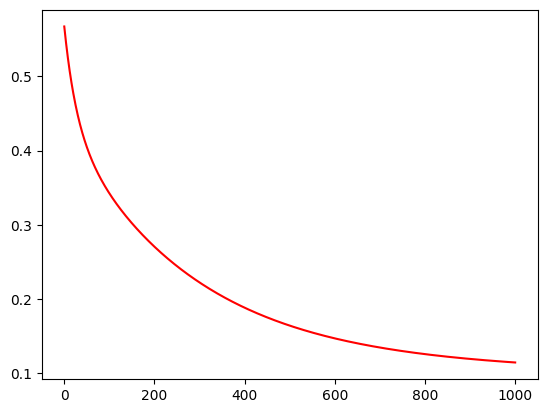

In [22]:
# In order to use an iterative optimisation method we need an initial guess:

w = np.zeros(M+1)

gd_losses = []
gd_losses.append(MSE_loss(X, y, w))

# ... and a step size
eta = 1e-2

number_of_iterations = 1000

for iter in range(number_of_iterations):
  # ----------------------------
  # Your code here
  gradient = grad(X,y,w)
  w -= eta*gradient

  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_losses.append(loss)

  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red')

**Question 5** Experiment different powers of ten for the step sizes $\eta$, empirically what value is the largest for which you get good performance? What does this suggest about the smoothness of $L(\mathbf{w})$?

Learning Rate: 0.0001, Iteration: 100, Loss: 0.5615052898994072
Learning Rate: 0.0001, Iteration: 200, Loss: 0.5558599207236637
Learning Rate: 0.0001, Iteration: 300, Loss: 0.5503826053906441
Learning Rate: 0.0001, Iteration: 400, Loss: 0.5450671139831137
Learning Rate: 0.0001, Iteration: 500, Loss: 0.5399074642063862
Learning Rate: 0.0001, Iteration: 600, Loss: 0.5348979109471498
Learning Rate: 0.0001, Iteration: 700, Loss: 0.5300329362992335
Learning Rate: 0.0001, Iteration: 800, Loss: 0.5253072400342832
Learning Rate: 0.0001, Iteration: 900, Loss: 0.5207157304963893
Learning Rate: 0.0001, Iteration: 1000, Loss: 0.5162535159007611


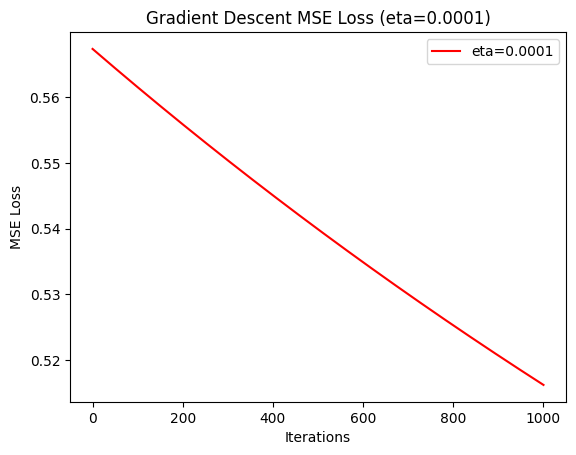

Learning Rate: 0.001, Iteration: 100, Loss: 0.5162254573222503
Learning Rate: 0.001, Iteration: 200, Loss: 0.4777547332912085
Learning Rate: 0.001, Iteration: 300, Loss: 0.44804721009005644
Learning Rate: 0.001, Iteration: 400, Loss: 0.424486618969807
Learning Rate: 0.001, Iteration: 500, Loss: 0.4052868233665033
Learning Rate: 0.001, Iteration: 600, Loss: 0.3892187239920369
Learning Rate: 0.001, Iteration: 700, Loss: 0.37543040384406384
Learning Rate: 0.001, Iteration: 800, Loss: 0.36332741171628236
Learning Rate: 0.001, Iteration: 900, Loss: 0.35249229490312417
Learning Rate: 0.001, Iteration: 1000, Loss: 0.342630037233654


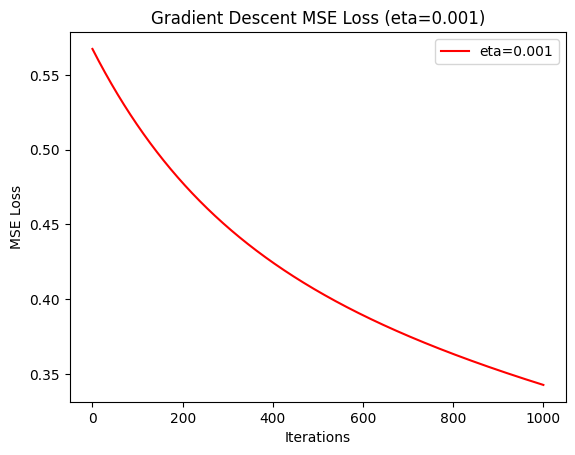

Learning Rate: 0.01, Iteration: 100, Loss: 0.3424596915046165
Learning Rate: 0.01, Iteration: 200, Loss: 0.2705385288237505
Learning Rate: 0.01, Iteration: 300, Loss: 0.22235042208580835
Learning Rate: 0.01, Iteration: 400, Loss: 0.1883369135623193
Learning Rate: 0.01, Iteration: 500, Loss: 0.16419488670892152
Learning Rate: 0.01, Iteration: 600, Loss: 0.14698892011545484
Learning Rate: 0.01, Iteration: 700, Loss: 0.1346618096389896
Learning Rate: 0.01, Iteration: 800, Loss: 0.1257685630926071
Learning Rate: 0.01, Iteration: 900, Loss: 0.11929369141138924
Learning Rate: 0.01, Iteration: 1000, Loss: 0.11452338244179731


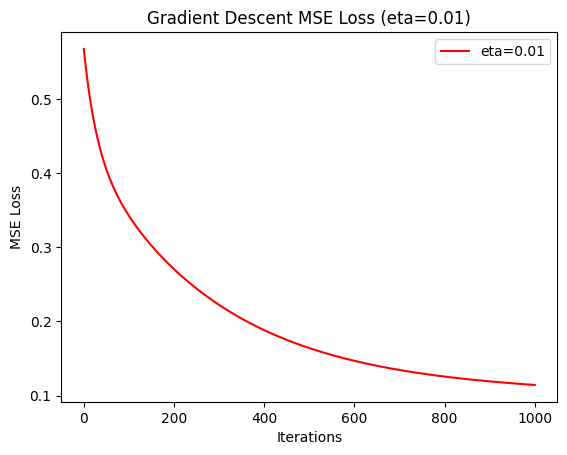

Learning Rate: 0.1, Iteration: 100, Loss: 0.11425626883479414
Learning Rate: 0.1, Iteration: 200, Loss: 0.09839176709257609
Learning Rate: 0.1, Iteration: 300, Loss: 0.09241494596777122
Learning Rate: 0.1, Iteration: 400, Loss: 0.08759760085777714
Learning Rate: 0.1, Iteration: 500, Loss: 0.0835074298263975
Learning Rate: 0.1, Iteration: 600, Loss: 0.08000942152626052
Learning Rate: 0.1, Iteration: 700, Loss: 0.07700797189224466
Learning Rate: 0.1, Iteration: 800, Loss: 0.07442706537402392
Learning Rate: 0.1, Iteration: 900, Loss: 0.07220395656904921
Learning Rate: 0.1, Iteration: 1000, Loss: 0.07028595062157621


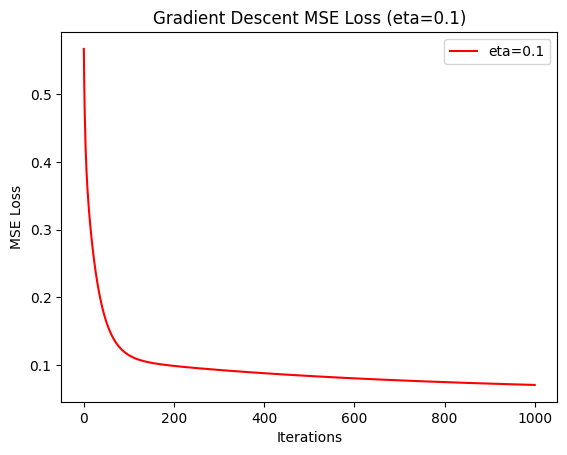

In [35]:
# In order to use an iterative optimisation method we need an initial guess:

w = np.zeros(M+1)

gd_losses = []
gd_losses.append(MSE_loss(X, y, w))

number_of_iterations = 1000
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for eta in learning_rates:
    # Initialize weights for each learning rate
    w = np.zeros(X.shape[1])
    
    gd_losses = []
    gd_losses.append(MSE_loss(X, y, w))
    
    for iter in range(number_of_iterations):
        # Compute gradient
        gradient = grad(X, y, w)
        
        # Update weights
        w -= eta * gradient
        
        # Compute and record loss
        loss = MSE_loss(X, y, w)
        gd_losses.append(loss)
        
        if iter % 100 == 99:
            print(f'Learning Rate: {eta}, Iteration: {iter+1}, Loss: {loss}')
    
    # Plot losses for the current learning rate
    plt.figure()  # Create a new figure for each learning rate
    plt.plot(np.arange(len(gd_losses)), gd_losses, label=f'eta={eta}', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('MSE Loss')
    plt.title(f'Gradient Desce  nt MSE Loss (eta={eta})')
    plt.legend()
    plt.show()

**Gradient Descent with Backtracing Line Search**

We will now optimise L using GD however we will use a line search method to select $\eta$ at each update according to the Armijo-Goldstein Condition with hyperparameter c.

\begin{align*}
f(\mathbf{w} - \eta_{t,k}\nabla f(\mathbf{w})) \leq f(\mathbf{w}) - c \eta_{t,k} \| \nabla f(\mathbf{w})\|^2,
\end{align*}

In [38]:
def check_armijo_goldstein_conditions(grad, loss, trail_point_loss, eta, c):
  grad_norm = np.linalg.norm(grad)
  if trail_point_loss <= loss - c * eta * grad_norm:
    return True
  else:
    return False

To run the backtracking line search we first select a trial point $\mathbf{w}'$,  according to $\mathbf{w}_0' = \mathbf{w}_t - \eta_{t,0} \nabla f$ where $\eta_0 = \gamma$. If a trial point satisfies the acceptance condition, we set $\mathbf{w}_t = \mathbf{w}_t'$, otherwise  $\eta_{t,k+1} = \alpha \eta_{t,k}$. And select the next trail point according to $\mathbf{w}_t' = \mathbf{w}_t - \eta_{t,k} \nabla f$.

**Question 6** Implement GD with backtracking line search and run it for 1000 steps, save the loss value after each step in the list 'line_search_losses'.

Iteration 100, Loss: 0.07689437721013145
Iteration 200, Loss: 0.064689583810975
Iteration 300, Loss: 0.06010796425906486
Iteration 400, Loss: 0.05813492341693645
Iteration 500, Loss: 0.05708388712839346
Iteration 600, Loss: 0.05641141966010316
Iteration 700, Loss: 0.05592607950494438
Iteration 800, Loss: 0.05555214452789312
Iteration 900, Loss: 0.055253930387469063
Iteration 1000, Loss: 0.055011072465147574


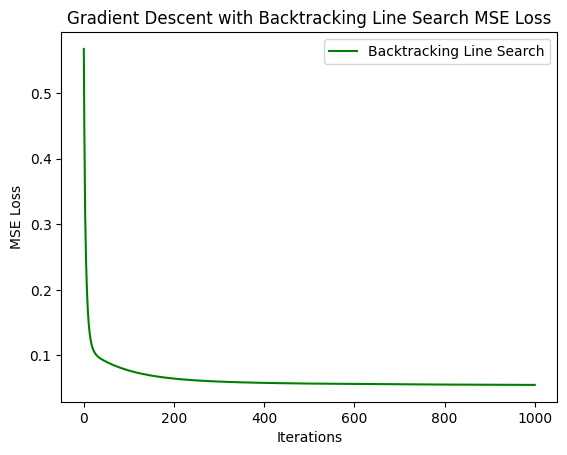

In [39]:
w = np.zeros(M+1)

line_search_losses = []
line_search_losses.append(MSE_loss(X, y, w))

c = 0.001 # acceptance condition of the backtracking line search
gamma = 10 # learning rate
alpha = 0.8 # to multiply with learning rate
max_k = 50 # make number of line search steps

number_of_iteratons = 1000
loss = MSE_loss(X, y, w)

for iter in range(number_of_iterations):
    gradient = grad(X, y, w)
    eta = gamma
    loss_current = MSE_loss(X, y, w)
    
    for k in range(max_k):
        w_trial = w - eta * gradient
        loss_trial = MSE_loss(X, y, w_trial)
        
        if check_armijo_goldstein_conditions(gradient, loss_current, loss_trial, eta, c):
            w = w_trial
            break
        else:
            eta *= alpha
    
    loss = MSE_loss(X, y, w)
    line_search_losses.append(loss)
    
    if iter % 100 == 99:
        print(f"Iteration {iter + 1}, Loss: {loss}")

# Plotting the results
plt.plot(np.arange(len(line_search_losses)), line_search_losses, 'green', label='Backtracking Line Search')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent with Backtracking Line Search MSE Loss')
plt.legend()
plt.show()

**Gradient Descent with Momentum**

\begin{align*}
\mathbf{m}_{0} &= 0,\\
\mathbf{m}_{t+1} &= \mu \mathbf{m}_{t} - \eta_t \nabla f(\mathbf{w}_t),\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} + \mathbf{m}_{t+1}.
\end{align*}

**Question 7** Implement GD with momentum for 1000 steps, save the loss value after each step in the list 'gd_with_momentum_losses'. What do you notice when comparing against GD without Momentum?

0.11242689889215578
0.09867362358669163
0.092765858188551
0.08787367238710742
0.08371984409000058
0.08017093450713825
0.07712898177089544
0.07451607301793976
0.07226789038240283
0.07033041816055863


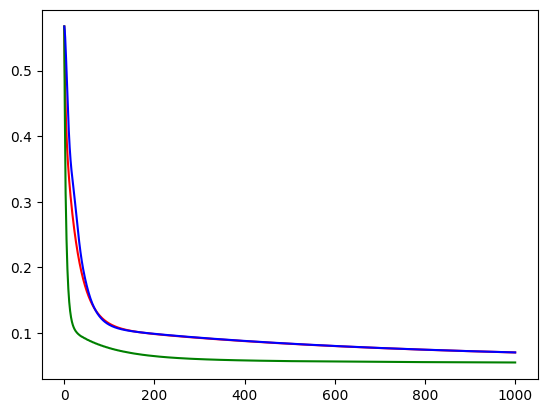

In [40]:
w = np.zeros(M+1)
momentum = np.zeros(M+1)

gd_with_momenutm_losses = []
gd_with_momenutm_losses.append(MSE_loss(X, y, w))

# ... and a step size

eta = 1e-2  # learning rate
mu = 0.9    # momentum coefficient

number_of_iterations = 1000

m = 0 # initialise velocity

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here
  gradient = grad(X, y, w)
  m = mu*m - eta*gradient
  w += m
  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_with_momenutm_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')

**Gradient Descent with Nesterov Momentum**


\begin{align*}
\mathbf{m}_{0} &= 0,\\
\mathbf{m}_{t+1} &= \mu \mathbf{m}_{t} - \eta \nabla f(\mathbf{w}_t + \mu \mathbf{m}_{t}),\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} + \mathbf{m}_{t+1}.
\end{align*}

**###Optional### Question 8** Implement GD with nesterov momentum for 1000 steps, save the loss value after each step in the list 'gd_with_momenutm_losses'.

In [ ]:
w = np.zeros(M+1)
momentum = np.zeros(M+1)

gd_with_nesterov_momentum = []
gd_with_nesterov_momentum.append(MSE_loss(X, y, w))

# ... and a step size

eta = 1e-2
mu = 0.9

number_of_iterations = 1000

for iter in range(number_of_iterations):
  # ----------------------------
  # Your code here

  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_with_nesterov_momentum.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momentum)),gd_with_nesterov_momentum, 'yellow', label='gd_with_momentum')

**Exact Second Order**

\begin{align*}
\mathbf{w}_{t+1} = \mathbf{w}_{t} -{H}_f^{-1}\nabla f(\mathbf{w}_t).
\end{align*}

Where ${H}_f$ is the hessain.

**Question 9** Implement the exact second order optimiser 1000 steps, save the loss value after each step in the list 'second_order_losses'.

In [ ]:
w = np.zeros(M+1)

second_order_losses = []
second_order_losses.append(MSE_loss(X, y, w))

# ... note here we don't need learning rate

number_of_iteratons = 1000

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here

  # ----------------------------
  loss = MSE_loss(X, y, w)
  second_order_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')


**Question 10** Try adjusting the learning rates, which optimier is quickest? How many steps does it take to converge? Why is this? Which is the second quickest?



**Reading** - Gradient Free Optimiation



Gradient Free Coodinate Descent

Gradient free optimisers are useful when the gradient can't easily be calculated. Instead of using the gradient they only use loss values. They start by picking a candidate direction $\mathbf{p}_t$ and then evalulating the loss in the direction of $\mathbf{p}_t$.


In this assignment you will code up the three point alogruthm that selects the next point according to:

\begin{equation}
\mathbf{w}_{t+1} = \text{argmin}\{ f(\mathbf{w}_t - \eta \mathbf{p}_t), f(\mathbf{w}_t), f(\mathbf{w}_t + \eta \mathbf{p}_t )\}
\end{equation}

In words we pick the next iterate to be the point with lowest loss out of the three trail points.

In the coodinate descent optimiser $\mathbf{p}_t$ is sampled from $\{\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_d\}$ with equal probability where $\mathbf{e}_i$ is the $i^{th}$ unit vertor.




**Question 11** Implement the a gradient free coodinate descent optimiser and run for 1000 steps, save the loss value after each step in the list 'coord_dec_losses'.

In [ ]:
w = np.zeros(M+1)

coord_dec_losses = []
coord_dec_losses.append(MSE_loss(X, y, w))

number_of_iteratons = 1000
eta = 0.1

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here


  # --------------------------
  loss = MSE_loss(X, y, w)
  coord_dec_losses.append(loss)
  eta *= 0.999
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')
plt.plot(np.arange(len(coord_dec_losses)),coord_dec_losses, 'purple')

**Optional - Question 12** Implement a gradient free optimiser that instead selects $\mathbf{p}$ uniformly from the unit hyper-sphere of dimention $d=$ (M+1) and run it for 1000 steps, save the loss value after each step in the list 'coord_dec_losses'.

In [ ]:
w = np.zeros(M+1)

grad_free_losses = []
grad_free_losses.append(MSE_loss(X, y, w))

number_of_iteratons = 1000
eta = 0.1

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here

  # --------------------------
  loss = MSE_loss(X, y, w)
  grad_free_losses.append(loss)
  eta *= 0.999
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')
plt.plot(np.arange(len(coord_dec_losses)),coord_dec_losses, 'purple')
plt.plot(np.arange(len(grad_free_losses)),grad_free_losses, 'orange')

In [ ]:
# Run this cell if you want to visualise a final model
yhat = X@w
plt.plot(x,y,'o', x, yhat, 'red')

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')